In [1]:
!pip install dlib

In [100]:
import dlib
import cv2
import numpy as np

# create list for landmarks
ALL = list(range(0, 68))
RIGHT_EYEBROW = list(range(17, 22))
LEFT_EYEBROW = list(range(22, 27))
RIGHT_EYE = list(range(36, 42))
LEFT_EYE = list(range(42, 48))
NOSE = list(range(27, 36))
MOUTH_OUTLINE = list(range(48, 61))
MOUTH_INNER = list(range(61, 68))
JAWLINE = list(range(0, 17))


# dlib 의 정면 얼굴 검출기 이용
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

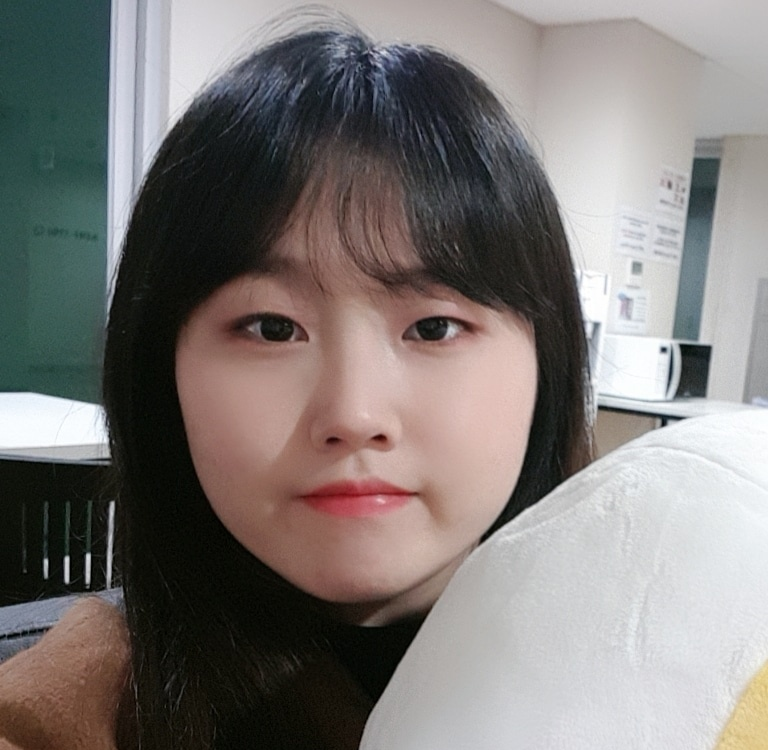

In [101]:
from google.colab.patches import cv2_imshow
image = cv2.imread('mapping_test2.jpg')
cv2_imshow(image)

In [102]:
image = cv2.resize(image,dsize=(160,160),interpolation=cv2.INTER_AREA)
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [76]:
 # Get faces (up-sampling=1)
face_detector = detector(img_gray, 1)
# the number of face detected
print("The number of faces detected : {}".format(len(face_detector)))

The number of faces detected : 1


In [ ]:
# 전체 landmark detection

from google.colab.patches import cv2_imshow
for face in face_detector:

   
    landmarks = predictor(image, face)  # 얼굴에서 68개 점 찾기


    landmark_list = []


     append (x, y) in landmark_list
     for p in landmarks.parts():
         landmark_list.append([p.x, p.y])
         cv2.circle(image, (p.x, p.y), 2, (0, 255, 0), -1)


cv2_imshow(image)


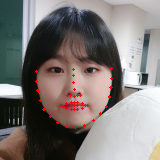

In [104]:
# 코, 입, 턱선 landmark detection

from google.colab.patches import cv2_imshow

face_detectors = detector(img_gray, 1)

for i, face_detector in enumerate(face_detectors):
    
    ## 찾은 얼굴의 박스좌표
    l = face_detector.left()
    t = face_detector.top()
    b = face_detector.bottom()
    r = face_detector.right()

    ## facial landmark 찾기
    shape = predictor(image, face_detector)
        
    ## facial landmark를 빨간색 점으로 찍어서 표현
    for j in NOSE:
        x, y = shape.part(j).x, shape.part(j).y
        cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

    for j in MOUTH_OUTLINE:
        x, y = shape.part(j).x, shape.part(j).y
        cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

    for j in MOUTH_INNER:
        x, y = shape.part(j).x, shape.part(j).y
        cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

    for j in JAWLINE:
        x, y = shape.part(j).x, shape.part(j).y
        cv2.circle(image, (x, y), 1, (0, 0, 255), -1)


cv2_imshow(image)

